In [1]:
%matplotlib inline      

In [2]:
from jupiterworkflow.data import get_freemont_data

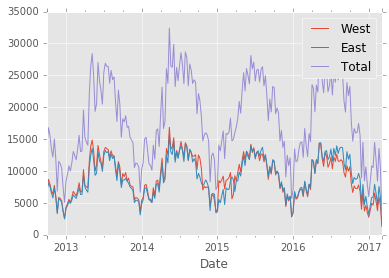

In [3]:
mydata = get_freemont_data()
mydata.resample('W').sum().plot()

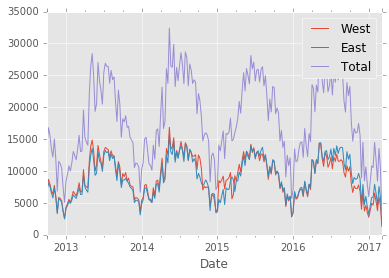

In [4]:
mydata.resample('W').sum().plot()

(0, 1100000.0)

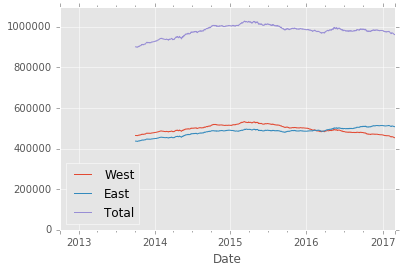

In [5]:
ax = mydata.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

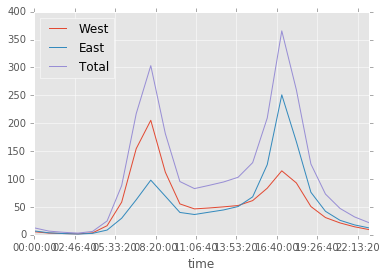

In [6]:
mydata.groupby(mydata.index.time).mean().plot()

In [7]:
pivoted = mydata.pivot_table('Total',index=mydata.index.time, columns=mydata.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


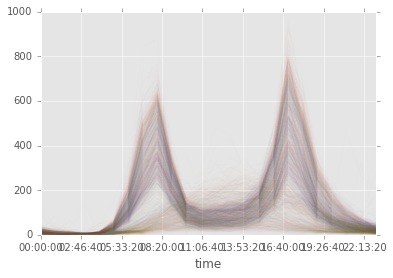

In [9]:
pivoted.plot(legend=False, alpha=0.01)

In [19]:
get_freemont_data??

In [18]:
"""Signature: get_freemont_data(filename='Freemont.csv', url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', force_download=False)
Docstring:"""
"""When pressing Shift + Tab on parenthesis"""

"""get_freemont_data(Shift+tab)""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-18-a7115d3a6a28>, line 5)